# Filtracja

Ważnym zagadnieniem w dziedzinie przetwarzania obrazów jest również proces filtracji. Filtrować można na przykład obrazy zawierające szumy, w celu uzyskania obrazów wolnych od zakłóceń. Poniżej zaprezentowano proces dodawania szumu gaussowskiego oraz szumu typu 'sól i pieprz' do obrazów.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


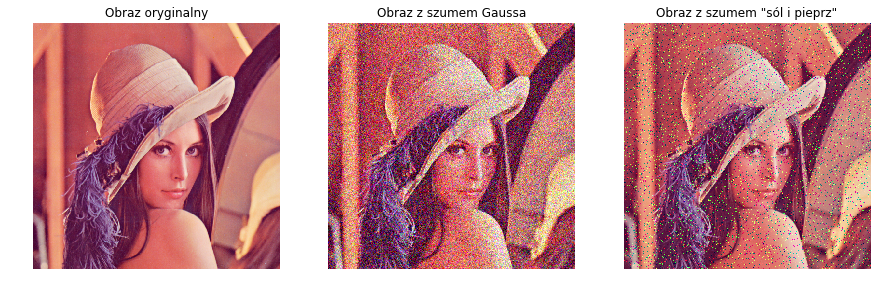

In [171]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('../obrazy_testowe/lena_512x512.png')
imgColArray = np.array(img)/255

# szum Gaussa
row, col, ch= imgColArray.shape
mean = 0
var = 0.1
sigma = var**0.8
gauss = np.random.normal(mean, sigma, (row,col,ch))
gauss = gauss.reshape(row, col, ch)
imgGauss = imgColArray + gauss

# szum sól i pieprz
sp = 0.5
amount = 0.05
imgSaltPepper = np.copy(imgColArray)

numSalt = np.ceil(amount * imgColArray.size * sp)
coords = [np.random.randint(0, i - 1, int(numSalt)) for i in imgColArray.shape]
imgSaltPepper[tuple(coords)] = 1

numPepper = np.ceil(amount* imgColArray.size * (1. - sp))
coords = [np.random.randint(0, i - 1, int(numPepper)) for i in imgColArray.shape]
imgSaltPepper[tuple(coords)] = 0

plt.figure(figsize = (15, 10))

plt.subplot(131)
plt.imshow(imgColArray)
plt.title('Obraz oryginalny')
plt.axis('off')

plt.subplot(132)
plt.imshow(imgGauss)
plt.title('Obraz z szumem Gaussa')
plt.axis('off')

plt.subplot(133)
plt.imshow(imgSaltPepper)
plt.title('Obraz z szumem "sól i pieprz"')
plt.axis('off')

plt.show()

Obraz zawierający szum, można następnie przefiltrować za pomocą kilku metod. Dla każdego typu szumu powinno się dopasować sposób filtracji, ponieważ metoda znacząco wpływa na wyniki.  

### Filtracja uśredniająca

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


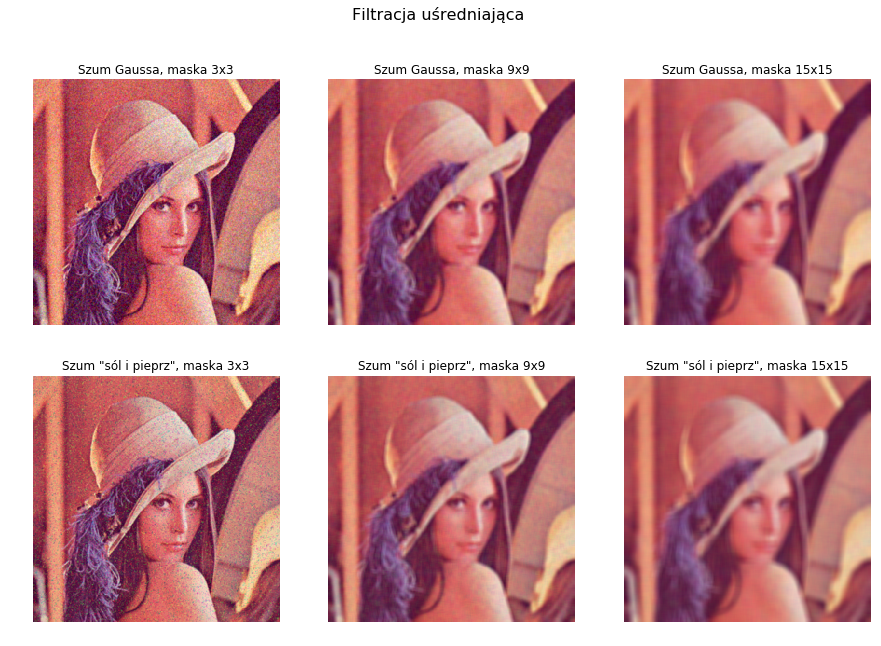

In [172]:
imgGnoiseFavg3 = cv2.blur(imgGauss, (3,3))
imgGnoiseFavg9 = cv2.blur(imgGauss, (9,9))
imgGnoiseFavg15 = cv2.blur(imgGauss, (15,15))

imgSnoiseFavg3 = cv2.blur(imgSaltPepper, (3,3))
imgSnoiseFavg9 = cv2.blur(imgSaltPepper, (9,9))
imgSnoiseFavg15 = cv2.blur(imgSaltPepper, (15,15))

plt.figure(figsize = (15, 10))

plt.subplot(231)
plt.imshow(imgGnoiseFavg3)
plt.title('Szum Gaussa, maska 3x3')
plt.axis('off')
plt.subplot(232)
plt.imshow(imgGnoiseFavg9)
plt.title('Szum Gaussa, maska 9x9')
plt.axis('off')
plt.subplot(233)
plt.imshow(imgGnoiseFavg15)
plt.title('Szum Gaussa, maska 15x15')
plt.axis('off')

plt.subplot(234)
plt.imshow(imgSnoiseFavg3)
plt.title('Szum "sól i pieprz", maska 3x3')
plt.axis('off')
plt.subplot(235)
plt.imshow(imgSnoiseFavg9)
plt.title('Szum "sól i pieprz", maska 9x9')
plt.axis('off')
plt.subplot(236)
plt.imshow(imgSnoiseFavg15)
plt.title('Szum "sól i pieprz", maska 15x15')
plt.axis('off')

plt.suptitle("Filtracja uśredniająca", fontsize=16)
plt.show()

### Filtracja gaussowska

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


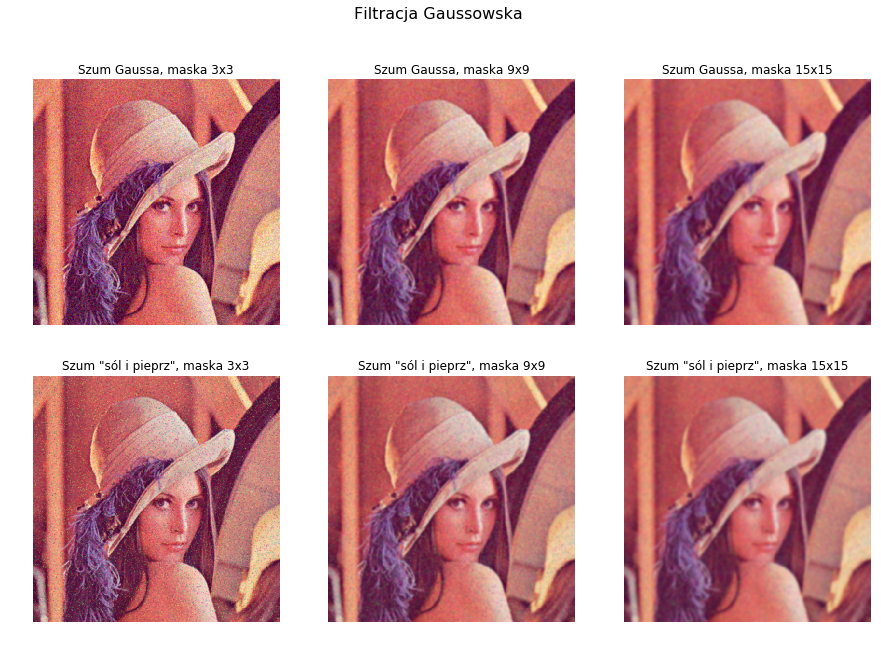

In [173]:
imgGnoiseFgauss3 = cv2.GaussianBlur(imgGauss, (3,3), 0)
imgGnoiseFgauss9 = cv2.GaussianBlur(imgGauss, (9,9), 0)
imgGnoiseFgauss15 = cv2.GaussianBlur(imgGauss, (15,15), 0)

imgSnoiseFgauss3 = cv2.GaussianBlur(imgSaltPepper, (3,3), 0)
imgSnoiseFgauss9 = cv2.GaussianBlur(imgSaltPepper, (9,9), 0)
imgSnoiseFgauss15 = cv2.GaussianBlur(imgSaltPepper, (15,15), 0)

plt.figure(figsize = (15, 10))

plt.subplot(231)
plt.imshow(imgGnoiseFgauss3)
plt.title('Szum Gaussa, maska 3x3')
plt.axis('off')
plt.subplot(232)
plt.imshow(imgGnoiseFgauss9)
plt.title('Szum Gaussa, maska 9x9')
plt.axis('off')
plt.subplot(233)
plt.imshow(imgGnoiseFgauss15)
plt.title('Szum Gaussa, maska 15x15')
plt.axis('off')

plt.subplot(234)
plt.imshow(imgSnoiseFgauss3)
plt.title('Szum "sól i pieprz", maska 3x3')
plt.axis('off')
plt.subplot(235)
plt.imshow(imgSnoiseFgauss9)
plt.title('Szum "sól i pieprz", maska 9x9')
plt.axis('off')
plt.subplot(236)
plt.imshow(imgSnoiseFgauss15)
plt.title('Szum "sól i pieprz", maska 15x15')
plt.axis('off')

plt.suptitle("Filtracja Gaussowska", fontsize=16)
plt.show()

### Filtracja medianowa

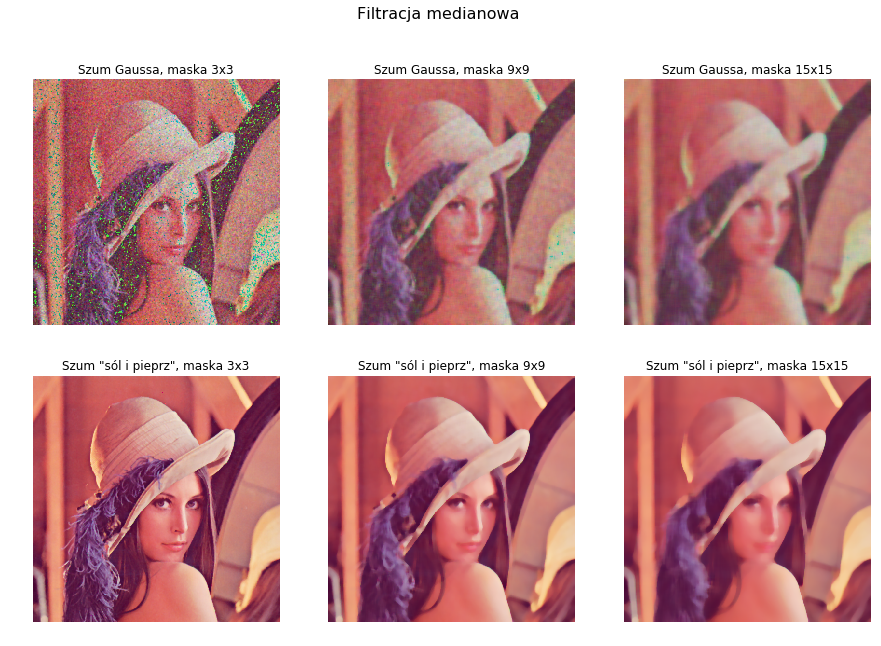

In [174]:
imgGauss = np.array(imgGauss*255, dtype = np.uint8)
imgSaltPepper = np.array(imgSaltPepper*255, dtype = np.uint8)

imgGnoiseFmedian3 = cv2.medianBlur(imgGauss, 3)
imgGnoiseFmedian9 = cv2.medianBlur(imgGauss, 9)
imgGnoiseFmedian15 = cv2.medianBlur(imgGauss, 15)

imgSnoiseFmedian3 = cv2.medianBlur(imgSaltPepper, 3)
imgSnoiseFmedian9 = cv2.medianBlur(imgSaltPepper, 9)
imgSnoiseFmedian15 = cv2.medianBlur(imgSaltPepper, 15)

plt.figure(figsize = (15, 10))

plt.subplot(231)
plt.imshow(imgGnoiseFmedian3)
plt.title('Szum Gaussa, maska 3x3')
plt.axis('off')
plt.subplot(232)
plt.imshow(imgGnoiseFmedian9)
plt.title('Szum Gaussa, maska 9x9')
plt.axis('off')
plt.subplot(233)
plt.imshow(imgGnoiseFmedian15)
plt.title('Szum Gaussa, maska 15x15')
plt.axis('off')

plt.subplot(234)
plt.imshow(imgSnoiseFmedian3)
plt.title('Szum "sól i pieprz", maska 3x3')
plt.axis('off')
plt.subplot(235)
plt.imshow(imgSnoiseFmedian9)
plt.title('Szum "sól i pieprz", maska 9x9')
plt.axis('off')
plt.subplot(236)
plt.imshow(imgSnoiseFmedian15)
plt.title('Szum "sól i pieprz", maska 15x15')
plt.axis('off')

plt.suptitle("Filtracja medianowa", fontsize=16)
plt.show()

Na podstawie powyższych przykładów można wywnioskować, iż z szumem typu 'sól i pieprz' najlepiej radzi sobie filtracja medianowa, nawet przy małym rozmiarze maski. W przypadku szumu gaussowskiego, najlepszy wynik otrzymujemy przy filtracji gaussowskiej, jednakże należy pamiętać, że przy stosowaniu większych masek, stracimy również więcej informacji.